In [46]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import linregress
import requests
import hvplot.pandas

In [47]:
original_file = 'heart_attack_prediction_dataset.csv'
predictions = 'output_predictions.csv'
original_df = pd.read_csv(original_file)
predictions_df = pd.read_csv(predictions)

In [48]:
original_df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [29]:
predictions_df.head(5)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic,Diastolic,HeartRisk
0,0.625557,-0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,...,1.234604,0.179251,1.280130,0.373454,-0.588539,-1.528843,-0.514750,0.870044,0.193782,1
1,-1.539322,-0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,-1.563129,-0.297225,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,1.135714,0.534480,1
2,-1.539322,1.517992,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372188,...,1.234604,1.001031,0.955917,-0.113134,0.756800,0.223577,-1.520604,1.477290,0.943319,0
3,1.425621,-0.658765,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032188,...,1.234604,0.477557,-0.404902,1.198524,-0.177339,-0.214528,-1.520604,1.059809,1.011458,1
4,0.578495,-0.658765,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727941,...,0.185454,-1.292170,0.028445,-1.120826,-0.834365,-1.090738,-1.017677,-1.672797,0.193782,1


In [30]:
#original_df["Heart Attack Risk"] = predictions_df["HeartRisk"]
original_df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [31]:
original_df[['Systolic', 'Diastolic']] = original_df['Blood Pressure'].str.split('/', expand=True)
original_df = original_df.drop('Blood Pressure', axis=1)
original_df.head(5)

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [32]:
income = original_df.groupby(["Heart Attack Risk"])["Income"].mean()
income_df = pd.DataFrame(income)
income_df

,Income
Heart Attack Risk,
0,157683.662873
1,159301.479133


Text(0, 0.5, 'Income')

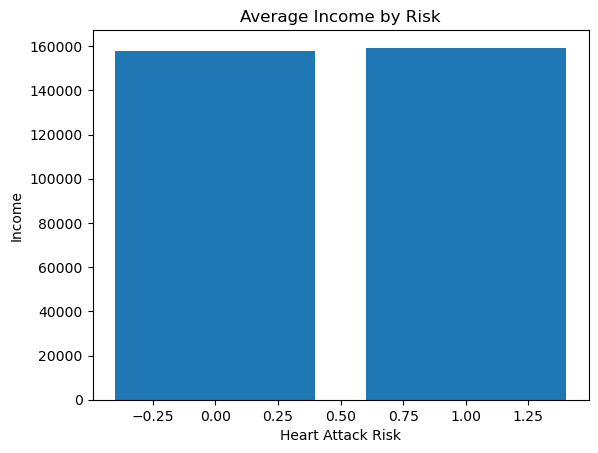

In [33]:
# Income vs heart risk
x_axis= income_df.index
y_axis= income_df["Income"]
plt.bar(x_axis, y_axis)
plt.title("Average Income by Risk")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Income")

In [34]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [35]:
age = original_df.groupby(["Heart Attack Risk"])["Age"].mean()
age_df = pd.DataFrame(age)
age_df

,Age
Heart Attack Risk,
0,53.606330
1,53.890092


Text(0, 0.5, 'Age')

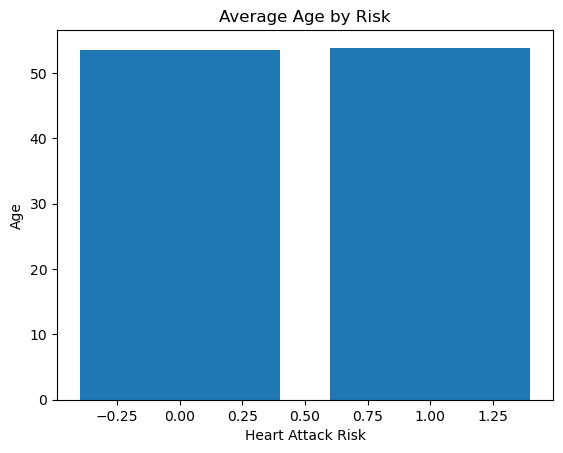

In [36]:
# Age vs heart risk
x_axis= age_df.index
y_axis= age_df["Age"]
plt.bar(x_axis, y_axis)
plt.title("Average Age by Risk")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Age")

In [37]:
men= original_df[original_df["Heart Attack Risk"] == 1].groupby("Sex")["Heart Attack Risk"].count()
men

Sex
Female     944
Male      2195
Name: Heart Attack Risk, dtype: int64

In [38]:
positive = original_df[original_df["Heart Attack Risk"] == 1].groupby("Sex")["Heart Attack Risk"].count()
negative = original_df[original_df["Heart Attack Risk"] == 0].groupby("Sex")["Heart Attack Risk"].count()
Sex_df = pd.DataFrame({"Positive": positive, "Negative": negative})
Sex_df["Ratio"] = Sex_df["Positive"] / Sex_df["Negative"]
Sex_df.head()

,Positive,Negative,Ratio
Sex,,,
Female,944,1708,0.552693
Male,2195,3916,0.560521


Text(0, 0.5, 'Heart Attack Risk')

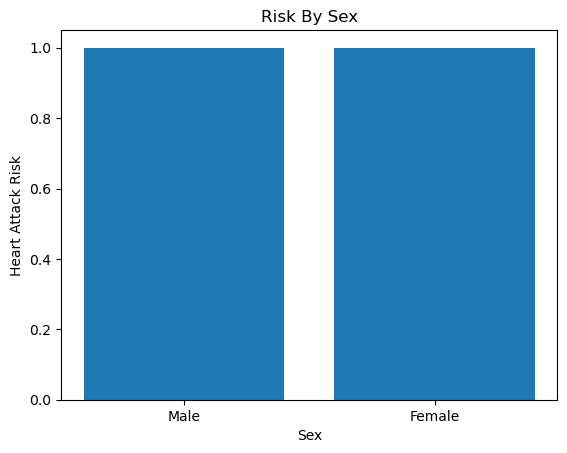

In [64]:
# Sex vs heart risk
x_axis= original_df["Sex"]
y_axis= original_df["Heart Attack Risk"]
plt.bar(x_axis, y_axis)
plt.title("Risk By Sex")
plt.xlabel("Sex")
plt.ylabel("Heart Attack Risk")

In [40]:
positive = original_df[original_df["Heart Attack Risk"] == 1].groupby("Country")["Heart Attack Risk"].count()
negative = original_df[original_df["Heart Attack Risk"] == 0].groupby("Country")["Heart Attack Risk"].count()
countries_df = pd.DataFrame({"Positive": positive, "Negative": negative})
countries_df["Ratio"] = countries_df["Positive"] / countries_df["Negative"]
countries_df.head()

,Positive,Negative,Ratio
Country,,,
Argentina,174,297,0.585859
Australia,168,281,0.597865
Brazil,163,299,0.545151
Canada,158,282,0.560284
China,155,281,0.551601


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'China'),
  Text(5, 0, 'Colombia'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'India'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Japan'),
  Text(11, 0, 'New Zealand'),
  Text(12, 0, 'Nigeria'),
  Text(13, 0, 'South Africa'),
  Text(14, 0, 'South Korea'),
  Text(15, 0, 'Spain'),
  Text(16, 0, 'Thailand'),
  Text(17, 0, 'United Kingdom'),
  Text(18, 0, 'United States'),
  Text(19, 0, 'Vietnam')])

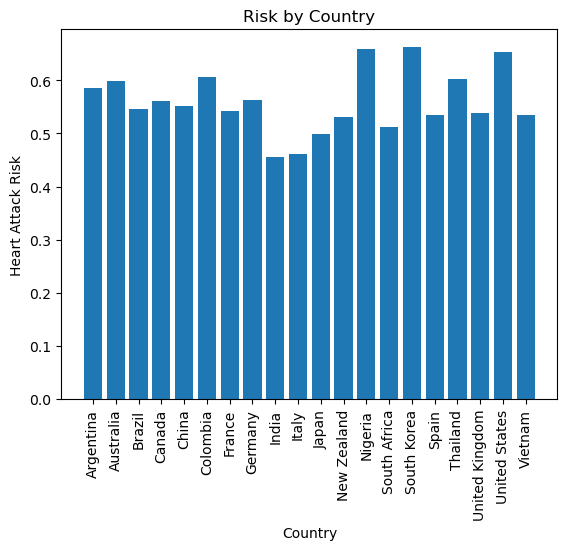

In [41]:
# Country vs heart risk
x_axis= countries_df.index
y_axis=  countries_df["Ratio"]
plt.bar(x_axis, y_axis)
plt.title("Risk by Country")
plt.xlabel("Country")
plt.ylabel("Heart Attack Risk")
plt.xticks(rotation="vertical")

In [59]:
positive = original_df[original_df["Heart Attack Risk"] == 1].groupby("Alcohol Consumption")["Heart Attack Risk"].count()
negative = original_df[original_df["Heart Attack Risk"] == 0].groupby("Alcohol Consumption")["Heart Attack Risk"].count()
Alcohol_df = pd.DataFrame({"Positive": positive, "Negative": negative})
Alcohol_df["Ratio"] = Alcohol_df["Positive"] / Alcohol_df["Negative"]
#Alcohol_df.replace({0: 'no', 1: 'yes'}, inplace=True)
Alcohol_df.head()

,Positive,Negative,Ratio
Alcohol Consumption,,,
0,1290,2232,0.577957
1,1849,3392,0.545106


(array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ]),
 [Text(-0.5, 0, '−0.50'),
  Text(-0.25, 0, '−0.25'),
  Text(0.0, 0, '0.00'),
  Text(0.25, 0, '0.25'),
  Text(0.5, 0, '0.50'),
  Text(0.75, 0, '0.75'),
  Text(1.0, 0, '1.00'),
  Text(1.25, 0, '1.25'),
  Text(1.5, 0, '1.50')])

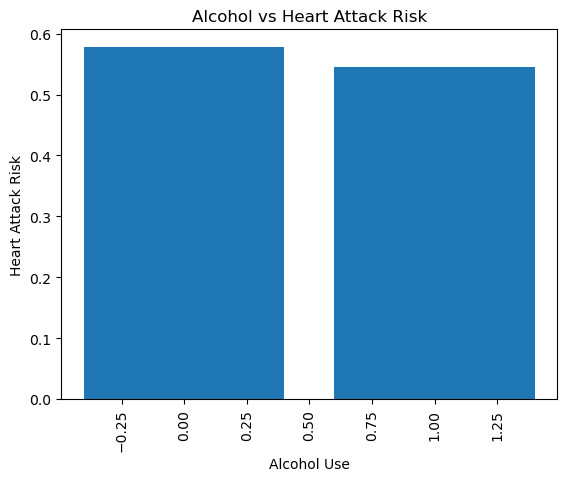

In [63]:
x_axis= Alcohol_df.index
y_axis=  Alcohol_df["Ratio"]
plt.bar(x_axis, y_axis)
plt.title("Alcohol vs Heart Attack Risk")
plt.xlabel("Alcohol Use")
plt.ylabel("Heart Attack Risk")
plt.xticks(rotation="vertical")

In [61]:
positive = original_df[original_df["Heart Attack Risk"] == 1].groupby("Smoking")["Heart Attack Risk"].count()
negative = original_df[original_df["Heart Attack Risk"] == 0].groupby("Smoking")["Heart Attack Risk"].count()
Smoking_df = pd.DataFrame({"Positive": positive, "Negative": negative})
Smoking_df["Ratio"] = Smoking_df["Positive"] / Smoking_df["Negative"]
Smoking_df.head()

,Positive,Negative,Ratio
Smoking,,,
0,329,575,0.572174
1,2810,5049,0.556546


(array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ]),
 [Text(-0.5, 0, '−0.50'),
  Text(-0.25, 0, '−0.25'),
  Text(0.0, 0, '0.00'),
  Text(0.25, 0, '0.25'),
  Text(0.5, 0, '0.50'),
  Text(0.75, 0, '0.75'),
  Text(1.0, 0, '1.00'),
  Text(1.25, 0, '1.25'),
  Text(1.5, 0, '1.50')])

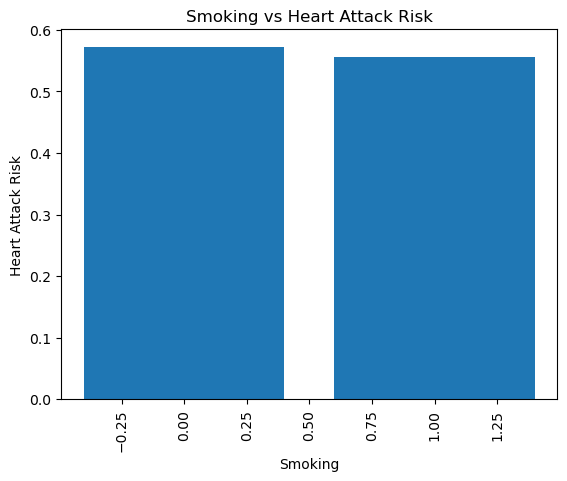

In [62]:
x_axis= Smoking_df.index
y_axis=  Smoking_df["Ratio"]
plt.bar(x_axis, y_axis)
plt.title("Smoking vs Heart Attack Risk")
plt.xlabel("Smoking")
plt.ylabel("Heart Attack Risk")
plt.xticks(rotation="vertical")

In [83]:
Workout = original_df.groupby(["Heart Attack Risk"])["Exercise Hours Per Week"].mean()
Workout_df = pd.DataFrame(Workout)
Workout_df

,Exercise Hours Per Week
Heart Attack Risk,
0,9.966182
1,10.100466


Text(0, 0.5, 'Exercise Hours Per Week')

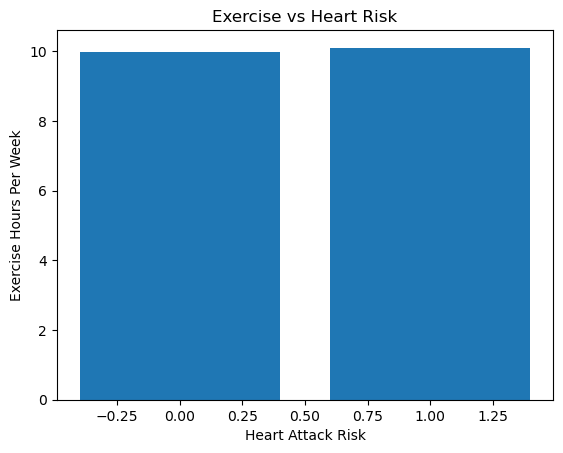

In [84]:
x_axis= Workout_df.index
y_axis= Workout_df["Exercise Hours Per Week"]
plt.bar(x_axis, y_axis)
plt.title("Exercise vs Heart Risk")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Exercise Hours Per Week")

In [73]:
Sedentary = original_df.groupby(["Heart Attack Risk"])["Sedentary Hours Per Day"].mean()*7
Sedentary_df = pd.DataFrame(Sedentary)
Sedentary_df

,Sedentary Hours Per Day
Heart Attack Risk,
0,42.057576
1,41.773539


Text(0, 0.5, 'Sedentary Hours Per Week')

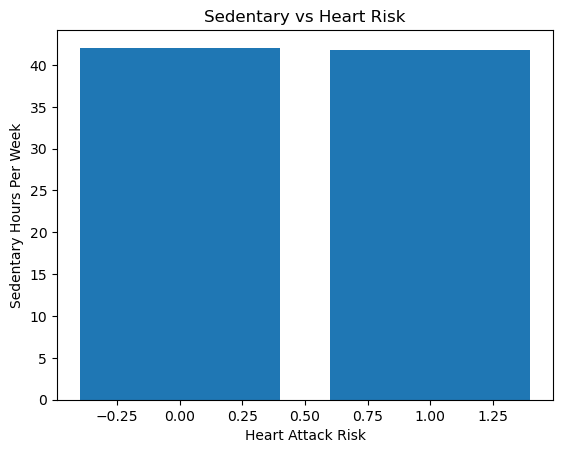

In [74]:
x_axis= Sedentary_df.index
y_axis= Sedentary_df["Sedentary Hours Per Day"]
plt.bar(x_axis, y_axis)
plt.title("Sedentary vs Heart Risk")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Sedentary Hours Per Week")

In [78]:
positive = original_df[original_df["Heart Attack Risk"] == 1].groupby("Physical Activity Days Per Week")["Heart Attack Risk"].count()
negative = original_df[original_df["Heart Attack Risk"] == 0].groupby("Physical Activity Days Per Week")["Heart Attack Risk"].count()
Physical_df = pd.DataFrame({"Positive": positive, "Negative": negative})
Physical_df["Ratio"] = Smoking_df["Positive"] / Smoking_df["Negative"]
Physical_df.head()

,Positive,Negative,Ratio
Physical Activity Days Per Week,,,
0,414,651,0.572174
1,388,733,0.556546
2,393,716,NaN
3,401,742,NaN
4,385,692,NaN
